# EDA YELP + MAPS
##### ANÁLISIS EXPLORATORIO DE DATOS DE INFORMACIÓN SUMINISTRADA POR EL SITIO YELP Y GOOGLE MAPS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import builtin.utils as ut

import warnings
warnings.filterwarnings("ignore")

StatementMeta(, , , Waiting, )

In [ ]:
pip install fastparquet

StatementMeta(, , , Waiting, )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 134.0 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 134.0 MB/s eta 0:00:00


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Carga de datos desde el DL
yp = pd.read_parquet('/lakehouse/default/Files/df_database/files_to_EDA/Yelp_to_EDA.parquet')
mp = pd.read_parquet('/lakehouse/default/Files/df_database/files_to_EDA/Maps_to_EDA.parquet',engine='fastparquet')


StatementMeta(, , , Waiting, )

##### Como es de nuestro interés un analisis unificado de toda la información, realizamos una concatenación de la información suministrada por ambos sitios.

In [ ]:
df = pd.concat([yp, mp]).reset_index(drop = True)

StatementMeta(, , , Waiting, )

In [ ]:
## Visualización del dataframe completo
df.head(2)

StatementMeta(, , , Waiting, )

,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,2014-05-26 01:09:53,335,6_SpY41LIHZuIaiDs5FMKA,4,This is nice little Chinese bakery in the hear...,K,[Restaurants]
1,Monsú,901 Christian St,Philadelphia,IN,39.939138,-75.157907,4.0,309,2014-12-04 07:03:34,292,6_SpY41LIHZuIaiDs5FMKA,2,Had a mediocre late-lunch here on a Saturday a...,K,[Restaurants]


In [ ]:
df_business = df[["Business_Name"]]
df_business = df_business.drop_duplicates()
df_business = df_business.reset_index(drop = True)
df_business["Business_Id"] = df_business.index + 1
order = ['Business_Id', 'Business_Name']
df_business = df_business[order]
df_business.head(2)

StatementMeta(, , , Waiting, )

,Business_Id,Business_Name
0,1,St Honore Pastries
1,2,Monsú


In [ ]:
df = pd.merge(df, df_business, on="Business_Name", how= "left")
df = df[["Business_Id", "Business_Name", "Address", "City", "State", "Latitude", "Longitude", "Ranking", "Review_Count", "Date", "Checkin_Count", "User_Id", "Stars", "Text", "User_Name", "Category"]]

StatementMeta(, , , Waiting, )

## Normalizamos los valores de la columna "State"

In [ ]:
## Diccionario con los datos de los estados
datos = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'State_Init': ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
}

# Crear el DataFrame
df_states = pd.DataFrame(datos)
df_states.head(2)

StatementMeta(, , , Waiting, )

,State,State_Init
0,Alabama,AL
1,Alaska,AK


In [ ]:
df['State'] = df['State'].apply(lambda x: df_states.loc[df_states['State_Init'] == x, 'State'].values[0] if x in df_states['State_Init'].values else x)

StatementMeta(, , , Waiting, )

Miramos el resumen de datos

In [ ]:
## Con el uso de la funcion planteada en utils, vemos cantidad de datos vacios en cada columna
ut.data_summ(df)

StatementMeta(, , , Waiting, )

       Column                                                           Data_type  No_miss_Qty  %Missing  Missing_Qty
  Business_Id                                                     [<class 'int'>]      6165047       0.0            0
Business_Name                                                     [<class 'str'>]      6165047       0.0            0
      Address                                                     [<class 'str'>]      6165047       0.0            0
         City                                                     [<class 'str'>]      6165047       0.0            0
        State                                                     [<class 'str'>]      6165047       0.0            0
     Latitude                                                   [<class 'float'>]      6165047       0.0            0
    Longitude                                                   [<class 'float'>]      6165047       0.0            0
      Ranking                                           

,Column,Data_type,No_miss_Qty,%Missing,Missing_Qty
0,Business_Id,[<class 'int'>],6165047,0.0,0
1,Business_Name,[<class 'str'>],6165047,0.0,0
2,Address,[<class 'str'>],6165047,0.0,0
3,City,[<class 'str'>],6165047,0.0,0
4,State,[<class 'str'>],6165047,0.0,0
5,Latitude,[<class 'float'>],6165047,0.0,0
6,Longitude,[<class 'float'>],6165047,0.0,0
7,Ranking,[<class 'float'>],6165047,0.0,0
8,Review_Count,[<class 'int'>],6165047,0.0,0
9,Date,[<class 'pandas._libs.tslibs.timestamps.Timest...,6165047,0.0,0


       Column                                                           Data_type  No_miss_Qty  %Missing  Missing_Qty
  Business_Id                                                     [<class 'int'>]      6165047       0.0            0
Business_Name                                                     [<class 'str'>]      6165047       0.0            0
      Address                                                     [<class 'str'>]      6165047       0.0            0
         City                                                     [<class 'str'>]      6165047       0.0            0
        State                                                     [<class 'str'>]      6165047       0.0            0
     Latitude                                                   [<class 'float'>]      6165047       0.0            0
    Longitude                                                   [<class 'float'>]      6165047       0.0            0
      Ranking                                           

##### Como es de nuestro interés la evalución por negocios, procedemos inicialmente a determinar la cantidad de negocios de los cuales se aporta información

In [ ]:
total_business = len(df["Business_Name"].unique())
print(f"Total business: {total_business}")

StatementMeta(, , , Waiting, )

Total business: 52854


Total business: 52854


## TRATAMIENTO DE VARIABLES CATEGÓRICAS

In [ ]:
##Desanidado de datos que contiene la columna "categories"
df_explode = ut.explode_column(df, "Category")
df_explode

StatementMeta(, , , Waiting, )

,Business_Id,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,1,St Honore Pastries,935 Race St,Philadelphia,California,39.955505,-75.155564,4.0,80,2014-05-26 01:09:53,335,6_SpY41LIHZuIaiDs5FMKA,4,This is nice little Chinese bakery in the hear...,K,Restaurants
1,2,Monsú,901 Christian St,Philadelphia,Indiana,39.939138,-75.157907,4.0,309,2014-12-04 07:03:34,292,6_SpY41LIHZuIaiDs5FMKA,2,Had a mediocre late-lunch here on a Saturday a...,K,Restaurants
2,3,Legal Sea Foods,8500 Essington Ave,Philadelphia,Florida,39.876009,-75.242965,4.0,326,2014-12-04 07:12:51,1335,6_SpY41LIHZuIaiDs5FMKA,2,Among the different Legal Sea Foods restaurant...,K,Restaurants
3,1,St Honore Pastries,935 Race St,Philadelphia,California,39.955505,-75.155564,4.0,80,2013-10-05 15:19:06,335,tCXElwhzekJEH6QJe3xs7Q,4,This is the bakery I usually go to in Chinatow...,Rob,Restaurants
4,4,Village Whiskey,118 S 20th St,Philadelphia,California,39.951417,-75.173768,4.0,1553,2011-06-02 01:56:45,3128,tCXElwhzekJEH6QJe3xs7Q,5,....the best burger I've had in my life. Just...,Rob,Restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165042,52854,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-01-13 04:40:40,1,117427464841505505280.0,3,ND,Max Eggers,Restaurant
6165043,52854,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-10-20 04:31:09,1,107747075795290669056.0,5,ND,Brian Lawton,Restaurant
6165044,52854,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2017-10-18 13:47:06,1,111433309018237845504.0,4,ND,Christopher Cantagallo,Restaurant
6165045,52854,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",Libertyville,Illinois,42.289450,-87.954386,4.6,228,2019-01-09 11:38:23,1,110361572886252994560.0,5,ND,Saira S,Restaurant


- ### Análisis por categoría

##### En un primer análisis, vamos a chequear la cantidad de negocios existentes según la categoría del mismo

In [ ]:
pd.set_option('display.max_rows', None)

StatementMeta(, , , Waiting, )

In [ ]:
# Recategorizamos las categorias propuestas por los sitios, para poder unificar la información.
df_explode["Category"] = df_explode["Category"].str.replace(r'.*restaurant.*', 'Restaurant', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Restaurants.*', 'Restaurant', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Restaurant.*', 'Restaurant', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Pubs.*', 'Pub', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*pub.*', 'Pub', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Pub.*', 'Pub', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Hotels.*', 'Hotel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*hotel.*', 'Hotel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Hotel.*', 'Hotel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Museum.*', 'Museum', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*museum.*', 'Museum', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*museum.*', 'Museum', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*agency.*', 'Agency and rental', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Rental.*', 'Agency and rental', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*rental.*', 'Agency and rental', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*park.*', 'Park', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Parks.*', 'Park', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Park.*', 'Park', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Zoos.*', 'Zoo', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Hostels.*', 'Hostel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*hostel.*', 'Hostel', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*mall.*', 'Shopping mall', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*gallery.*', 'Art gallery', regex=True)
df_explode["Category"] = df_explode["Category"].str.replace(r'.*Forestry.*', 'National forest', regex=True)


StatementMeta(, , , Waiting, )

In [ ]:
df_explode.head()

StatementMeta(, , , Waiting, )

,Business_Id,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,1,St Honore Pastries,935 Race St,Philadelphia,California,39.955505,-75.155564,4.0,80,2014-05-26 01:09:53,335,6_SpY41LIHZuIaiDs5FMKA,4,This is nice little Chinese bakery in the hear...,K,Restaurant
1,2,Monsú,901 Christian St,Philadelphia,Indiana,39.939138,-75.157907,4.0,309,2014-12-04 07:03:34,292,6_SpY41LIHZuIaiDs5FMKA,2,Had a mediocre late-lunch here on a Saturday a...,K,Restaurant
2,3,Legal Sea Foods,8500 Essington Ave,Philadelphia,Florida,39.876009,-75.242965,4.0,326,2014-12-04 07:12:51,1335,6_SpY41LIHZuIaiDs5FMKA,2,Among the different Legal Sea Foods restaurant...,K,Restaurant
3,1,St Honore Pastries,935 Race St,Philadelphia,California,39.955505,-75.155564,4.0,80,2013-10-05 15:19:06,335,tCXElwhzekJEH6QJe3xs7Q,4,This is the bakery I usually go to in Chinatow...,Rob,Restaurant
4,4,Village Whiskey,118 S 20th St,Philadelphia,California,39.951417,-75.173768,4.0,1553,2011-06-02 01:56:45,3128,tCXElwhzekJEH6QJe3xs7Q,5,....the best burger I've had in my life. Just...,Rob,Restaurant


In [ ]:
## Calculamos la cantidad de negocios por categoría propuesta
bus_per_category = df_explode.groupby("Category")["Business_Name"].nunique().reset_index()
bus_per_category = bus_per_category.sort_values(by="Business_Name", ascending = False)
bus_per_category = bus_per_category.rename(columns={"Business_Name": "business_count"})
bus_per_category

StatementMeta(, , , Waiting, )

,Category,business_count
8,Restaurant,43034
6,Park,3530
2,Hotel,2239
7,Pub,1809
10,Shopping mall,1795
0,Art gallery,786
4,Museum,472
3,Motel,151
11,Zoo,53
1,Hostel,31


StatementMeta(, , , Waiting, )

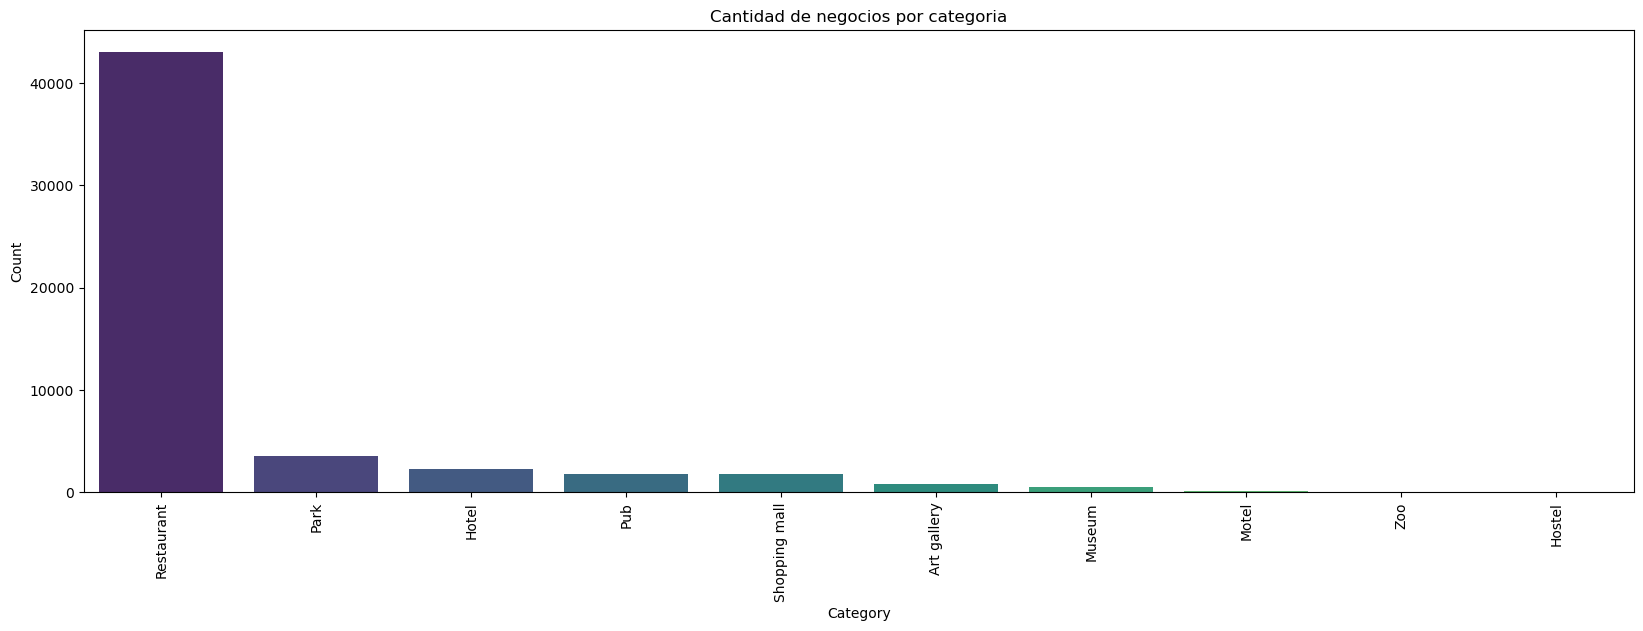

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(x="Category", y="business_count", data= bus_per_category.sort_values(by='business_count', ascending=False).head(10), palette='viridis')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Cantidad de negocios por categoria")
plt.xticks(rotation=90)
plt.show()

#### Miremos los Estados y Ciudades con mayor cantidad de negocios

##### Para un análisis mas detallado, podemos ver el porcentaje que representan esas categorias respecto al total de negocios.

In [ ]:
total_negocio = bus_per_category["business_count"].sum()
bus_per_category["porcentaje"] = (bus_per_category["business_count"] / total_negocio)*100
bus_per_category = bus_per_category.sort_values(by="porcentaje", ascending = False)
top_categories = bus_per_category.head(10)
print(top_categories)

StatementMeta(, , , Waiting, )

         Category  business_count  porcentaje
8      Restaurant           43034   79.793073
6            Park            3530    6.545279
2           Hotel            2239    4.151524
7             Pub            1809    3.354224
10  Shopping mall            1795    3.328265
0     Art gallery             786    1.457391
4          Museum             472    0.875176
3           Motel             151    0.279982
11            Zoo              53    0.098272
1          Hostel              31    0.057480


         Category  business_count  porcentaje
8      Restaurant           43034   79.793073
6            Park            3530    6.545279
2           Hotel            2239    4.151524
7             Pub            1809    3.354224
10  Shopping mall            1795    3.328265
0     Art gallery             786    1.457391
4          Museum             472    0.875176
3           Motel             151    0.279982
11            Zoo              53    0.098272
1          Hostel              31    0.057480


##### Tambien podemos ver la cantidad de reviews que contiene el database por categoria, adicional a la cantidad de negocios.

In [ ]:
rev_per_category = df_explode.groupby("Category")["Text"].count().reset_index()
rev_per_category = rev_per_category.rename(columns={"Text": "reviews_count"})
bus_per_category = bus_per_category[["Category", "business_count"]]

detail_per_categories = pd.merge(bus_per_category, rev_per_category, on="Category", how="outer")
print(detail_per_categories)


StatementMeta(, , , Waiting, )

           Category  business_count  reviews_count
0        Restaurant           43034        5390747
1              Park            3530         185450
2             Hotel            2239         218862
3               Pub            1809         175473
4     Shopping mall            1795         321028
5       Art gallery             786          19046
6            Museum             472          47464
7             Motel             151           3615
8               Zoo              53          27689
9            Hostel              31           1151
10  National forest              27           4310
11   Roller coaster               5            141


           Category  business_count  reviews_count
0        Restaurant           43034        5390747
1              Park            3530         185450
2             Hotel            2239         218862
3               Pub            1809         175473
4     Shopping mall            1795         321028
5       Art gallery             786          19046
6            Museum             472          47464
7             Motel             151           3615
8               Zoo              53          27689
9            Hostel              31           1151
10  National forest              27           4310
11   Roller coaster               5            141


##### Donde podemos ver que las primeras 5 categorías en cuestión contienen aproximadamente el 90% de la cantidad de negocios que tuvieron alguna reseña, sumado a que los mismos tienen la mayor cantidad de reviews registrados, indicándonos en que las mismas contamos con mayor cantidad de información a la hora de toma de decisión para el inversor.

- ### Analizamos por ciudad

In [ ]:
## Determinamos la cantidad de ciudades que contiene la base de YELP
total_city = len(df_explode["City"].unique())
print(f"Total city: {total_city}")

StatementMeta(, , , Waiting, )

Total city: 3945


Total city: 3945


##### Como contamos con gran cantidad de ciudades, primero vamos a obtener un dataframe con la cantidad de negocios por ciudades y solamente analizar el TOP 100

In [ ]:
bus_per_city = df_explode.groupby("City")["Business_Name"].nunique().reset_index()
bus_per_city = bus_per_city.rename(columns={"Business_Name": "business_count"})
bus_per_city = bus_per_city.sort_values(by="business_count", ascending = False)
bus_per_city = bus_per_city.head(100)

StatementMeta(, , , Waiting, )

In [ ]:
bus_per_city.sort_values(by='business_count',ascending=False).head(5)

StatementMeta(, , , Waiting, )

,City,business_count
2702,Philadelphia,2347
2380,New York,2105
595,Chicago,1697
3431,Tampa,1531
1580,Indianapolis,1479


##### Seguidamente, realizamos una visualización de cantidad de reviews por ciudades.

In [ ]:
rev_per_city = df_explode.groupby("City")["Text"].count().reset_index()
rev_per_city = rev_per_city.rename(columns={"Text": "reviews_count"})
rev_per_city = rev_per_city.sort_values(by="reviews_count", ascending = False)
rev_per_city = rev_per_city.head(100)

StatementMeta(, , , Waiting, )

##### Y hacemos una unificación de la información mencionada.

In [ ]:
detail_per_city = pd.merge(bus_per_city, rev_per_city, on="City")
detail_per_city = detail_per_city.head(25)
detail_per_city

StatementMeta(, , , Waiting, )

,City,business_count,reviews_count
0,Philadelphia,2347,326042
1,New York,2105,164081
2,Chicago,1697,160952
3,Tampa,1531,195879
4,Indianapolis,1479,222642
5,New Orleans,1403,276189
6,Los Angeles,1208,92978
7,Nashville,1116,181223
8,Tucson,954,116529
9,Edmonton,823,31299


In [ ]:
# Count the number of businesses per city
bus_per_city = df_explode.groupby("City")["Business_Name"].nunique().reset_index()
bus_per_city = bus_per_city.rename(columns={"Business_Name": "business_count"})
bus_per_city = bus_per_city.sort_values(by="business_count", ascending=False)
top_10_cities = bus_per_city[:10]

# Count the number of businesses per state
bus_per_state = df_explode.groupby("State")["Business_Name"].nunique().reset_index()
bus_per_state = bus_per_state.rename(columns={"Business_Name": "business_count"})
bus_per_state = bus_per_state.sort_values(by="business_count", ascending=False)
top_10_states = bus_per_state[:10]

# Print the results
print('Negocios por estado:', top_10_states)
print('Negocios por ciudad:', top_10_cities)

StatementMeta(, , , Waiting, )

Negocios por estado:                   State  business_count
2               Florida           13614
0            California           10710
9              New_York            7619
5               Indiana            5992
4              Illinois            5898
6             Louisiana            5249
8                Nevada            3868
7         Massachusetts            3222
1  District_of_Columbia             437
3                Hawaii               1
Negocios por ciudad:               City  business_count
2702  Philadelphia            2347
2380      New York            2105
595        Chicago            1697
3431         Tampa            1531
1580  Indianapolis            1479
2367   New Orleans            1403
1932   Los Angeles            1208
2323     Nashville            1116
3536        Tucson             954
976       Edmonton             823


Negocios por estado:                   State  business_count
2               Florida           13614
0            California           10710
9              New_York            7619
5               Indiana            5992
4              Illinois            5898
6             Louisiana            5249
8                Nevada            3868
7         Massachusetts            3222
1  District_of_Columbia             437
3                Hawaii               1
Negocios por ciudad:               City  business_count
2702  Philadelphia            2347
2380      New York            2105
595        Chicago            1697
3431         Tampa            1531
1580  Indianapolis            1479
2367   New Orleans            1403
1932   Los Angeles            1208
2323     Nashville            1116
3536        Tucson             954
976       Edmonton             823


StatementMeta(, , , Waiting, )

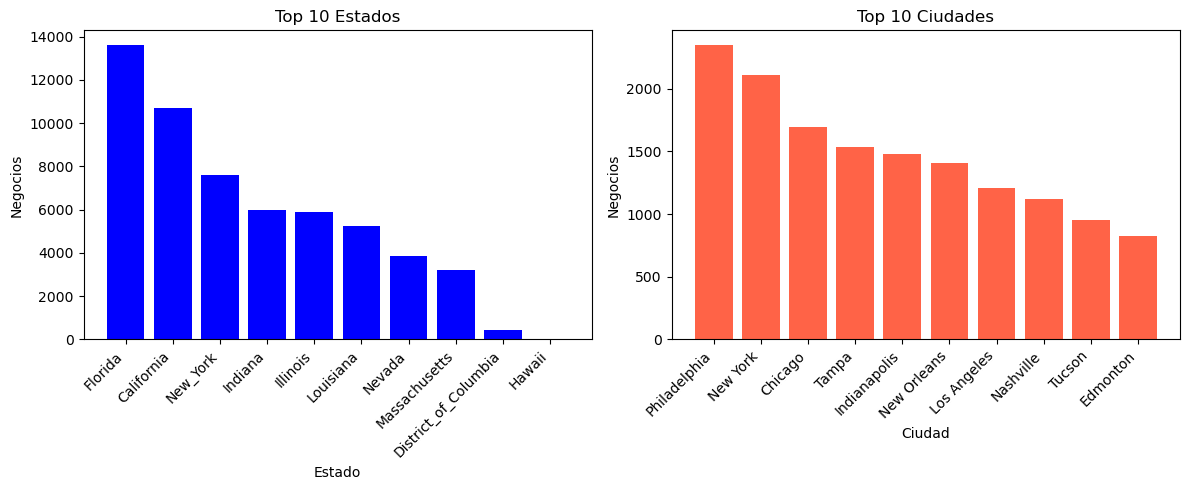

In [ ]:
# Define the size of the figure
plt.figure(figsize=(12, 5))

# Plot the top 10 states with the most businesses
plt.subplot(1, 2, 1)
plt.bar(top_10_states["State"], top_10_states["business_count"], color='blue')
plt.xlabel('Estado')
plt.ylabel('Negocios')
plt.title('Top 10 Estados')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x en 45 grados hacia la derecha

# Plot the top 10 cities with the most businesses
plt.subplot(1, 2, 2)
plt.bar(top_10_cities["City"], top_10_cities["business_count"], color='tomato')
plt.xlabel('Ciudad')
plt.ylabel('Negocios')
plt.title('Top 10 Ciudades')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x en 45 grados hacia la derecha

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

##### Observaciones:
- ##### Podemos ver que el TOP 10 de ciudades contienen la mayor cantidad de negocios que tuvieron alguna reseña.
- ##### Ese mismo TOP 10 de ciudades a su vez contiene también la mayor cantidad de reviews, indicándonos que esas ciudades son lugares con mucha recurrencia.
- ##### Aquellas ciudades que tienen gran cantidad de reviews y poca cantidad de negocios, es señal que contienen potenciales negocios con mucha recurrencia; lo mismo se aplica a la inversa.


##### Definimos la relación Cantidad de negocios / Cantidad de reviews, por ciudad, como un aporte para ayudarnos a visualizar a priori ciudades con potenciales negocios.

In [ ]:
detail_per_city["B/R"] = (detail_per_city["business_count"] / detail_per_city["reviews_count"])
detail_per_city = detail_per_city.sort_values(by="B/R", ascending = True)
sorted_df = detail_per_city.sort_values(by='reviews_count',ascending=False)
sorted_df

StatementMeta(, , , Waiting, )

,City,business_count,reviews_count,B/R
0,Philadelphia,2347,326042,0.007198
5,New Orleans,1403,276189,0.005080
4,Indianapolis,1479,222642,0.006643
3,Tampa,1531,195879,0.007816
7,Nashville,1116,181223,0.006158
1,New York,2105,164081,0.012829
2,Chicago,1697,160952,0.010544
12,Reno,698,117820,0.005924
8,Tucson,954,116529,0.008187
10,Las Vegas,789,96434,0.008182


In [ ]:
# Filtrar el DataFrame por cada categoría y contar la cantidad de negocios en cada estado
categories = ['Museum', "Shopping mall", 'Roller coaster', 'National forest', 'Art gallery', 'Zoo']
category_counts = {}
		
for category in categories:
    filtered_df = df_explode[df_explode['Category'] == category]
    category_counts[category] = filtered_df.groupby('State').size()

category_counts

StatementMeta(, , , Waiting, )

{'Museum': State
 California              4210
 District_of_Columbia      72
 Florida                 9723
 Illinois                6202
 Indiana                 6554
 Louisiana               4922
 Massachusetts           3820
 Nevada                  4163
 New_York                7798
 dtype: int64,
 'Shopping mall': State
 California              89049
 District_of_Columbia     1456
 Florida                 88465
 Illinois                25567
 Indiana                 30415
 Louisiana                8629
 Massachusetts           14433
 Nevada                  23953
 New_York                39061
 dtype: int64,
 'Roller coaster': State
 California       16
 Massachusetts    87
 New_York         38
 dtype: int64,
 'National forest': State
 California       3243
 Florida           760
 Illinois           78
 Indiana            36
 Louisiana          39
 Massachusetts      76
 Nevada             40
 New_York           38
 dtype: int64,
 'Art gallery': State
 California              4470


StatementMeta(, , , Waiting, )

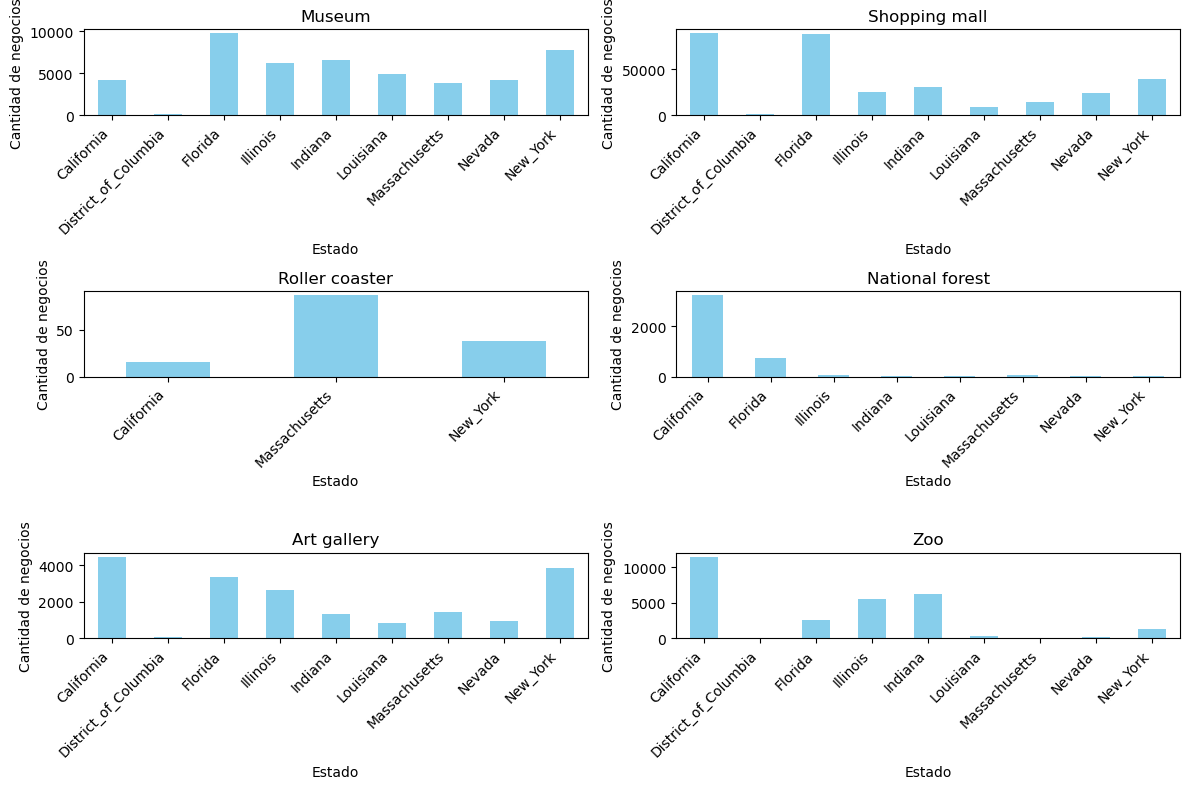

In [ ]:
# Graficar los datos
plt.figure(figsize=(12, 8))

for i, (category, counts) in enumerate(category_counts.items(), start=1):
    plt.subplot(3, 2, i)
    counts.plot(kind='bar', color='skyblue')
    plt.title(category)
    plt.xlabel('Estado')
    plt.ylabel('Cantidad de negocios')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## TRATAMIENTO DE VARIABLES NUMÉRICAS

##### Resumen estadístico

In [ ]:
df_explode.head()

StatementMeta(, , , Waiting, )

,Business_Id,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,1,St Honore Pastries,935 Race St,Philadelphia,California,39.955505,-75.155564,4.0,80,2014-05-26 01:09:53,335,6_SpY41LIHZuIaiDs5FMKA,4,This is nice little Chinese bakery in the hear...,K,Restaurant
1,2,Monsú,901 Christian St,Philadelphia,Indiana,39.939138,-75.157907,4.0,309,2014-12-04 07:03:34,292,6_SpY41LIHZuIaiDs5FMKA,2,Had a mediocre late-lunch here on a Saturday a...,K,Restaurant
2,3,Legal Sea Foods,8500 Essington Ave,Philadelphia,Florida,39.876009,-75.242965,4.0,326,2014-12-04 07:12:51,1335,6_SpY41LIHZuIaiDs5FMKA,2,Among the different Legal Sea Foods restaurant...,K,Restaurant
3,1,St Honore Pastries,935 Race St,Philadelphia,California,39.955505,-75.155564,4.0,80,2013-10-05 15:19:06,335,tCXElwhzekJEH6QJe3xs7Q,4,This is the bakery I usually go to in Chinatow...,Rob,Restaurant
4,4,Village Whiskey,118 S 20th St,Philadelphia,California,39.951417,-75.173768,4.0,1553,2011-06-02 01:56:45,3128,tCXElwhzekJEH6QJe3xs7Q,5,....the best burger I've had in my life. Just...,Rob,Restaurant


In [ ]:
df_explode.describe()

StatementMeta(, , , Waiting, )

,Business_Id,Latitude,Longitude,Ranking,Review_Count,Checkin_Count,Stars
count,6.394976e+06,6.394976e+06,6.394976e+06,6.394976e+06,6.394976e+06,6.394976e+06,6.394976e+06
mean,1.953554e+04,3.580865e+01,-9.043242e+01,4.039619e+00,9.470086e+02,3.528885e+02,4.067265e+00
std,1.926774e+04,5.623857e+00,1.611577e+01,5.512807e-01,1.532059e+03,1.531157e+03,1.252011e+00
min,1.000000e+00,2.454741e+01,-1.242194e+02,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00
25%,1.754000e+03,2.996029e+01,-9.049282e+01,3.800000e+00,1.050000e+02,1.000000e+00,4.000000e+00
50%,9.743000e+03,3.761791e+01,-8.614551e+01,4.100000e+00,3.460000e+02,1.000000e+00,5.000000e+00
75%,4.278000e+04,4.018077e+01,-8.018829e+01,4.500000e+00,1.168000e+03,1.570000e+02,5.000000e+00
max,5.285400e+04,5.364949e+01,-6.994921e+01,5.000000e+00,9.998000e+03,5.214400e+04,5.000000e+00


##### Distribución de variables numéricas

##### Graficaremos Histogramas para visualizar y comprender la distribución de los datos numéricos.

In [ ]:
## Seleccionamos las variables
numeric_var = df_explode[["Latitude", "Longitude", "Ranking", "Review_Count", "Checkin_Count", "Stars"]]

StatementMeta(, , , Waiting, )

StatementMeta(, , , Waiting, )

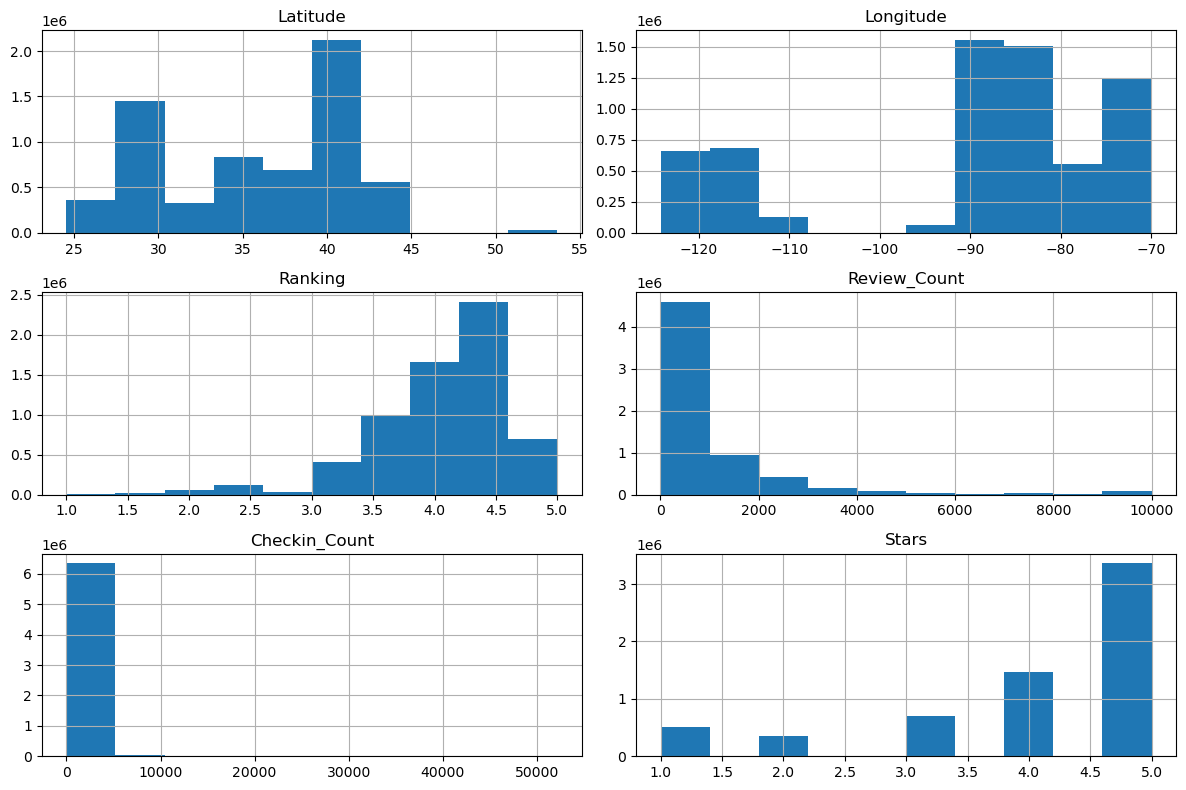

In [ ]:
## Generamos histogramas
numeric_var.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

##### ANÁLISIS visual de la información:

- ##### Con respecto a la latitud podemos ver una zona muy marcada entre 28 y 40 donde se encuentra la mayor cantidad de los negocios; con respecto a la longitud la zona marcada se encuentra entre -120/-110 y -90/-80.
- ##### La puntuación de los negocios ("stars_x") aportada por los sitios se encuentra en su mayoría dentro de 3.5 y 4.5.
- ##### La mayoría de los negocios tienen entre 100 y 600 reviews aportado por los usuarios.
- ##### La puntuación aportada por los usuarios ("stars_y") es mas crítica para observar; varia entre 2.0 a 5.0, lo cual toma relevancia al momento de la elección del negocio por parte del inversionista.

StatementMeta(, , , Waiting, )

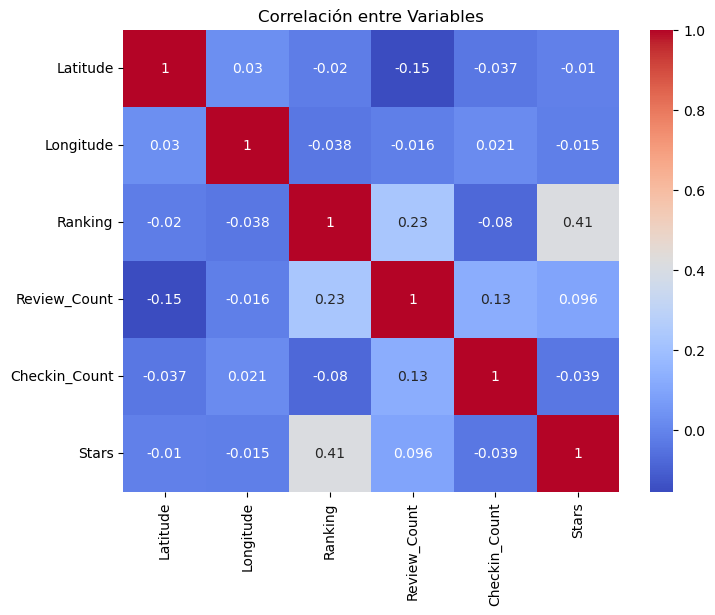

In [ ]:
## Gráfico de calor
selected_df = df_explode[["Latitude", "Longitude", "Ranking", "Review_Count", "Checkin_Count", "Stars"]]

# Calculo la matriz de correlación
correlation_matrix = selected_df.corr()

# Genero el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()

##### En el diagrama de correlación podemos ver que no se presenta relación entre las variables, excepto para la relación de reviews/checkin y puntuación x/y, las cuales ya sabemos que guardan una concordancia.

## TRATAMIENTO DE VARIABLES NUMÉRICAS Y CATEGÓRICAS

##### Nos resulta importante adicionar al tratamiento de variables categóricas, información de la puntuación de los negocios aportada por el sitio Yelp ("Ranking") y aquellas aportadas por los usuarios ("Stars"); para ellos propondremos agrupar dichos datos determinando el promedio de los mismos.

In [ ]:
df_explode.head()

StatementMeta(, , , Waiting, )

,Business_Id,Business_Name,Address,City,State,Latitude,Longitude,Ranking,Review_Count,Date,Checkin_Count,User_Id,Stars,Text,User_Name,Category
0,1,St Honore Pastries,935 Race St,Philadelphia,California,39.955505,-75.155564,4.0,80,2014-05-26 01:09:53,335,6_SpY41LIHZuIaiDs5FMKA,4,This is nice little Chinese bakery in the hear...,K,Restaurant
1,2,Monsú,901 Christian St,Philadelphia,Indiana,39.939138,-75.157907,4.0,309,2014-12-04 07:03:34,292,6_SpY41LIHZuIaiDs5FMKA,2,Had a mediocre late-lunch here on a Saturday a...,K,Restaurant
2,3,Legal Sea Foods,8500 Essington Ave,Philadelphia,Florida,39.876009,-75.242965,4.0,326,2014-12-04 07:12:51,1335,6_SpY41LIHZuIaiDs5FMKA,2,Among the different Legal Sea Foods restaurant...,K,Restaurant
3,1,St Honore Pastries,935 Race St,Philadelphia,California,39.955505,-75.155564,4.0,80,2013-10-05 15:19:06,335,tCXElwhzekJEH6QJe3xs7Q,4,This is the bakery I usually go to in Chinatow...,Rob,Restaurant
4,4,Village Whiskey,118 S 20th St,Philadelphia,California,39.951417,-75.173768,4.0,1553,2011-06-02 01:56:45,3128,tCXElwhzekJEH6QJe3xs7Q,5,....the best burger I've had in my life. Just...,Rob,Restaurant


In [ ]:
## Calculamos el promedio de ambas calificaciones
df_explode["avg_punt"] = (df_explode["Ranking"] + df_explode["Stars"]) / 2

# Agrupar la información por negocio incluida la información que la describe
df_nc = df_explode.groupby(["Business_Name", "Address", "City", "State", "Latitude", "Longitude", "Category"]).agg({"Checkin_Count": "mean", "Review_Count": "mean", "avg_punt": "mean"}).reset_index()
df_nc = df_nc.drop_duplicates()

StatementMeta(, , , Waiting, )

In [ ]:
df_nc.head()

StatementMeta(, , , Waiting, )

,Business_Name,Address,City,State,Latitude,Longitude,Category,Checkin_Count,Review_Count,avg_punt
0,"""BLUE ZEBRA"" LA ZEBRA AZUL RESTAURANT BAR, NIG...","""BLUE ZEBRA"" LA ZEBRA AZUL RESTAURANT BAR, NIG...",Lodi,California,38.122706,-121.260056,Restaurant,1.0,33.0,4.177778
1,"""SAVE ME SOME""","""SAVE ME SOME"", 819 E 142nd St, Dolton, IL 60419",Dolton,Illinois,41.636799,-87.596785,Restaurant,1.0,115.0,4.148039
2,"""TACOS"" MICHOACAN","""TACOS"" MICHOACAN, 18300 Vanowen St Ste 2, Res...",Los Angeles,California,34.193687,-118.531962,Restaurant,1.0,88.0,4.177273
3,"""ZITRO"", seafood & grill","""ZITRO"", seafood & grill, 11840 Foothill Blvd,...",Los Angeles,California,34.273246,-118.394763,Restaurant,1.0,35.0,4.537500
4,#Tequila Street Tacos and Cantina,"#Tequila Street Tacos and Cantina, 250 S Merid...",Indianapolis,Indiana,39.763122,-86.158450,Restaurant,1.0,33.0,3.550000



- ### Analizamos por ciudad

In [ ]:
## Agrupamos por ciudad y contamos la cantidad de negocios únicos
bus_per_city = df_nc.groupby("City")["Business_Name"].nunique().reset_index()
bus_per_city = bus_per_city.rename(columns={"Business_Name": "business_count"})
bus_per_city = bus_per_city.sort_values(by="business_count", ascending = False)

## Agrupamos por ciudad y contamos la cantidad de reviews
rev_per_city = df_nc.groupby("City")["Review_Count"].sum().reset_index()
rev_per_city = rev_per_city.sort_values(by="Review_Count", ascending = False)

## Agrupamos por ciudad y calculamos el promedio de la calificación
avg_per_city = df_nc.groupby("City")["avg_punt"].mean().reset_index()
avg_per_city = avg_per_city.sort_values(by="avg_punt", ascending = False)

## Agrupamos por ciudad y sumamos la cantidad de checkin
checkin_per_city = df_nc.groupby("City")["Checkin_Count"].sum().reset_index()
checkin_per_city = checkin_per_city.sort_values(by="Checkin_Count", ascending = False)

## Unificamos la información y presentamos el TOP 25
detail_per_city = pd.merge(bus_per_city, rev_per_city, on="City")
detail_per_city = pd.merge(detail_per_city, avg_per_city, on="City")
detail_per_city = pd.merge(detail_per_city, checkin_per_city, on="City")
detail_per_city.head(25)

StatementMeta(, , , Waiting, )

,City,business_count,Review_Count,avg_punt,Checkin_Count
0,Philadelphia,2347,307589.000000,3.547298,685279.0
1,New York,2105,323371.000000,4.171666,2365.0
2,Chicago,1697,293498.304348,4.199960,1944.0
3,Tampa,1531,203359.000000,3.635636,309690.0
4,Indianapolis,1479,267327.000000,3.654205,287139.0
5,New Orleans,1403,319496.000000,3.850583,505615.0
6,Los Angeles,1208,151864.000000,4.284755,1316.0
7,Nashville,1116,169569.000000,3.535631,307724.0
8,Tucson,954,107753.000000,3.439804,221139.0
9,Edmonton,823,29612.000000,3.516254,52966.0


##### Notamos que el promedio calculado de las puntuaciones agrupado por ciudades no presenta mucha variación. Si existe relación directa de la cantidad de reviews aportados por los usuarios con la cantidad de checkin registrados en dichos negocios.
##### Proponemos la siguiente relación entre las variables, para poder visualizar a priori aquellas ciudades con potencial de negocios; un valor alto representa un mayor potencial o atractivo para dicha ciudad.
##### 
- ##### rel_per_city = (reviews_count x count_checkin x avg_punt) / (business_count * 10000)

In [ ]:
detail_per_city ["rel_per_city"] = ( detail_per_city["Review_Count"]*detail_per_city["Checkin_Count"]*detail_per_city["avg_punt"] / (detail_per_city["business_count"]*100000))
detail_per_city = detail_per_city.sort_values(by="rel_per_city", ascending = False)
detail_per_city.head(10)

StatementMeta(, , , Waiting, )

,City,business_count,Review_Count,avg_punt,Checkin_Count,rel_per_city
5,New Orleans,1403,319496.0,3.850583,505615.0,4433.576906
0,Philadelphia,2347,307589.0,3.547298,685279.0,3185.831246
4,Indianapolis,1479,267327.0,3.654205,287139.0,1896.530172
7,Nashville,1116,169569.0,3.535631,307724.0,1653.143531
3,Tampa,1531,203359.0,3.635636,309690.0,1495.532075
12,Reno,698,116980.0,3.645676,238430.0,1456.783892
15,Santa Barbara,459,82432.0,3.810067,153085.0,1047.486474
11,Saint Louis,773,87738.0,3.546487,225732.0,908.656607
8,Tucson,954,107753.0,3.439804,221139.0,859.171870
23,St. Petersburg,295,69885.0,3.826402,35739.0,323.962620


In [ ]:
detail_per_city.tail(10)

StatementMeta(, , , Waiting, )

,City,business_count,Review_Count,avg_punt,Checkin_Count,rel_per_city
3734,Cayuta,1,18.0,2.775000,1.0,0.000499
2990,spring city,1,6.0,4.083333,2.0,0.000490
3776,Douglas City,1,18.0,2.609091,1.0,0.000470
3768,Ofallon,1,6.0,1.857143,4.0,0.000446
3677,Selkirk,1,14.0,2.631818,1.0,0.000368
3016,Tren,1,10.0,3.050000,1.0,0.000305
3010,Trainer,1,5.0,4.550000,1.0,0.000228
3654,RENO AP,1,5.0,3.550000,1.0,0.000178
3526,Linwood,1,5.0,3.100000,1.0,0.000155
3180,Washoe,1,6.0,1.916667,1.0,0.000115


##### Con la fórmula propuesta podemos ver que a pesar que una ciudad tenga una calificación promedio alta, el índice puede ser bajo al no tener suficiente cantidad de checkin en los negocios y por consiguiente baja cantidad de reviews; Tener un  índice alto y baja cantidad de negocios comentados, nos aporta información de que en dicha ciudad los negocios son de alta concurrencia y buena calidad, o que existen otros atractivos turísticos por los cuales concurren los usuarios.

- ### Analizamos por categoría

In [ ]:
## Agrupamos por categoría y contamos la cantida de negocios únicos
bus_per_category = df_nc.groupby("Category")["Business_Name"].nunique().reset_index()
bus_per_category = bus_per_category.rename(columns={"Business_Name": "business_count"})
bus_per_category = bus_per_category.sort_values(by="business_count", ascending = False)

## Agrupamos por categoría y contamos la cantidad de reviews
rev_per_category = df_nc.groupby("Category")["Review_Count"].sum().reset_index()
rev_per_category = rev_per_category.sort_values(by="Review_Count", ascending = False)

## Agrupamos por categoria y calculamos el promedio de la calificación
avg_per_category = df_nc.groupby("Category")["avg_punt"].mean().reset_index()
avg_per_category = avg_per_category.sort_values(by="avg_punt", ascending = False)

## Agrupamos por categoria y sumamos la cantida de checkin
checkin_per_category = df_nc.groupby("Category")["Checkin_Count"].sum().reset_index()
checkin_per_category = checkin_per_category.sort_values(by="Checkin_Count", ascending = False)

## Unificamos la información y presentamos el TOP 25
detail_per_category = pd.merge(bus_per_category, rev_per_category, on="Category")
detail_per_category = pd.merge(detail_per_category, avg_per_category, on="Category")
detail_per_category = pd.merge(detail_per_category, checkin_per_category, on="Category")
detail_per_category

StatementMeta(, , , Waiting, )

,Category,business_count,Review_Count,avg_punt,Checkin_Count
0,Restaurant,43034,7.669834e+06,3.960139,3556203.0
1,Park,3530,3.006010e+05,4.045455,92644.0
2,Hotel,2239,1.548480e+05,3.280289,335068.0
3,Pub,1809,2.361230e+05,3.763973,351962.0
4,Shopping mall,1795,4.464070e+05,4.285652,1910.0
5,Art gallery,786,3.630400e+04,4.651488,792.0
6,Museum,472,7.289200e+04,4.448060,57456.0
7,Motel,151,7.912000e+03,3.359885,160.0
8,Zoo,53,4.699800e+04,4.450560,8305.0
9,Hostel,31,1.680000e+03,3.620139,1187.0


##### Aplicamos la misma fórmula utilizada anteriormente.

In [ ]:
detail_per_category ["rel_per_category"] = ( detail_per_category["Review_Count"]*detail_per_category["Checkin_Count"]*detail_per_category["avg_punt"] / (detail_per_category["business_count"]*100000))
detail_per_category = detail_per_category.sort_values(by="rel_per_category", ascending = False)
detail_per_category

StatementMeta(, , , Waiting, )

,Category,business_count,Review_Count,avg_punt,Checkin_Count,rel_per_category
0,Restaurant,43034,7.669834e+06,3.960139,3556203.0,25099.858936
3,Pub,1809,2.361230e+05,3.763973,351962.0,1729.187077
2,Hotel,2239,1.548480e+05,3.280289,335068.0,760.145166
6,Museum,472,7.289200e+04,4.448060,57456.0,394.678876
8,Zoo,53,4.699800e+04,4.450560,8305.0,327.761404
1,Park,3530,3.006010e+05,4.045455,92644.0,319.154044
4,Shopping mall,1795,4.464070e+05,4.285652,1910.0,20.357144
9,Hostel,31,1.680000e+03,3.620139,1187.0,2.328754
5,Art gallery,786,3.630400e+04,4.651488,792.0,1.701567
10,National forest,27,6.480000e+03,4.645608,27.0,0.301035


##### Podemos ver que la categoría "Pubs" se encuentra en segunda posición debido a que tiene gran cantidad de checkin y reviews, y baja cantidad de negocios, dándonos un indicio que son empresas que brindan buen servicio y tienen mucha concurrencia, presentándose como una potencial oportunidad de negocio.

In [ ]:
df_explode['Date'] = pd.to_datetime(df_explode['Date'])
df_explode['User_Id'] = df_explode['User_Id'].astype(str).str.encode('utf-8')
##Guardamos el dataframe resumido de la información agrupada
df_nc.to_parquet('/lakehouse/default/Files/df_database/files_to_EDA/resume_data.parquet')

StatementMeta(, , , Waiting, )

In [ ]:
#Guardamos el dataframe detallado con los comentarios
df_explode.to_parquet('/lakehouse/default/Files/df_database/files_to_EDA/total_data.parquet')

StatementMeta(, , , Waiting, )